# Regression with Shallow Neural Networks
## Instructions

Implement a gradient descent algorithm for regression with multi-layer perceptron with single-hidden layer, using the tanh activation function and the quadratic loss. Apply the algorithm and plot the objective function during the iterations of the training process. 

## Imports & Settings

In [1]:
### Imports
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Add the utils directory to the path
sys.path.append(os.path.abspath("../utils"))
from networks import MLP

In [3]:
### Settings
SEED = 10
np.random.seed(SEED)

## Data

Generate 100 noisy observations $(x_i, y_i)_{i}$ of the function $f(x) = \sin(3\pi x)$, where the $(x_i)_{i}$ are uniformly distributed in $[0,1]$ and the values of the function are perturbed by Gaussian noise with zero mean and standard deviation $\sigma = 0.3$.



### Function

In [4]:
def f_x(x):
    """Ground truth function"""
    return np.sin(3 * np.pi * x)

### Noisy Data

In [5]:
### Samples
n = 100

### Noise
sig = 0.3

### Generate data
x = np.random.uniform(0, 1, n)
X = x.reshape(-1, 1)
y = f_x(x) + np.random.normal(0, sig, n)
Y = y.reshape(-1, 1)

### Shapes
print(X.shape, Y.shape)
print(x.shape, y.shape)

(100, 1) (100, 1)
(100,) (100,)


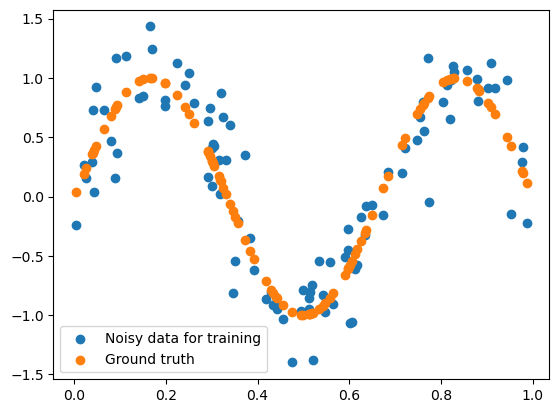

In [6]:
### Plot data
plt.scatter(x, y, label="Noisy data for training")
plt.scatter(x, f_x(x), label="Ground truth")
plt.legend()
plt.show()

# Network Architecture
The network consits of 3 layers:
- **input layer** $ X $ with $ n $ samples and $ d $ features
- **hidden layer** with $ h $ neurons
- **output layer** $ F_{\theta}(x) $ with $ n $ samples and $ o $ outputs
### Multi-Layer Perceptron (MLP) Equation

The forward pass of a one-hidden-layer MLP is defined as:
$$
F_{\theta}(X) = W_2 \cdot \sigma(W_1 X + b_1) + b_2
$$
where:

- $ W_1 $ is the **weight matrix** from input to hidden layer, shape $ (h, d) $, where $ h $ is the number of hidden neurons.
- $ b_1 $ is the **bias vector** for the hidden layer, shape $ (h, 1) $.
- $ \sigma $ is the **activation function** (e.g., ReLU, sigmoid, tanh), applied element-wise.
- $ W_2 $ is the **weight matrix** from hidden layer to output, shape $ (o, h) $, where $ o $ is the output dimension.
- $ b_2 $ is the **bias vector** for the output layer, shape $ (o, 1) $.

### Activation Function
Non-linearity is introduced by using 

$$
\sigma(Z) = \tanh(Z) = \frac{e^Z - e^{-Z}}{e^Z + e^{-Z}}
$$
where $ Z = W_1 X + b_1$ as activation function

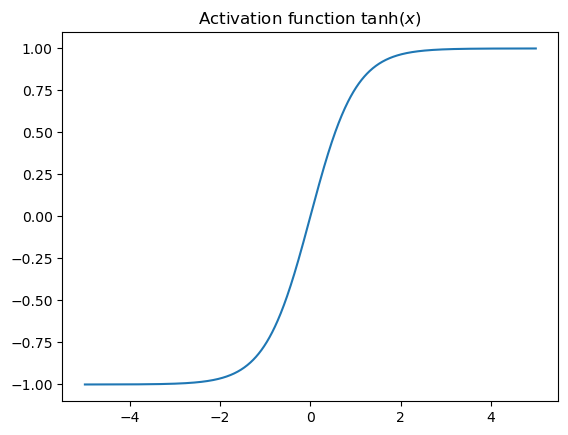

In [15]:
### Plot tanh
x_tanh = np.linspace(-5, 5, 1000)[:, None]
plt.plot(x_tanh, np.tanh(x_tanh))
plt.title(r"Activation function $\tanh(x)$")
plt.show()

### Loss Function

To train the network, we minimize the **Mean Squared Error (MSE) loss** with L2 regularization:

$$
L = \frac{1}{n} \sum (Y - F_{\theta}(X))^2 + \frac{\alpha}{2} \left( \|W_1\|^2 + \|W_2\|^2 + \|b_1\|^2 + \|b_2\|^2 \right)
$$

where:
- $ Y $ is the true output matrix, shape $ (o, n) $.
- $ F_{\theta}(X) $ is the predicted output, shape $ (o, n) $.
- $ W_1 $ and $ W_2 $ are the weight matrices.
- $ b_1 $ and $ b_2 $ are the bias vectors.
- $ \alpha $ is the **regularization strength**, controlling weight and bias penalty.

The first term **measures the prediction error**, while the second term **penalizes large weights and biases**, preventing overfitting.

### Gradients

Gradients are calculated separately for each parameter by calculating the partial derivatives.

#### 1. Gradient with Respect to $ W_2 $

Using the chain rule:

$$
\frac{\partial L}{\partial W_2} = \frac{2}{n} (F_{\theta}(X) - Y) H^T + \alpha W_2
$$

#### 2. Gradient with Respect to $ b_2 $

Since $ b_2 $ affects the loss directly:

$$
\frac{\partial L}{\partial b_2} = \frac{2}{n} \sum (F_{\theta}(X) - Y) + \alpha b_2
$$

#### 3. Gradient with Respect to $ W_1 $

Applying the chain rule through the activation function:

$$
\frac{\partial L}{\partial W_1} = \left( W_2^T \frac{2}{n} (F_{\theta}(X) - Y) \right) \odot (1 - H^2) X^T + \alpha W_1
$$

#### 4. Gradient with Respect to $ b_1 $

Following a similar approach:

$$
\frac{\partial L}{\partial b_1} = \sum \left( \left( W_2^T \frac{2}{n} (F_{\theta}(X) - Y) \right) \odot (1 - H^2) \right)
$$

where:
- $ H = \sigma(W_1 X + b_1) $ is the hidden layer activation.
- $ \odot $ represents **element-wise multiplication**.
- $ \alpha $ is the **regularization strength**, which prevents large weights.

These gradients are used in the **backpropagation step** to update the parameters.


In [18]:
### Test model
model = MLP(max_iter=3_000)
model.fit(X, Y)
Y_pred = model.predict(X)
Y_pred.shape

(100, 1)

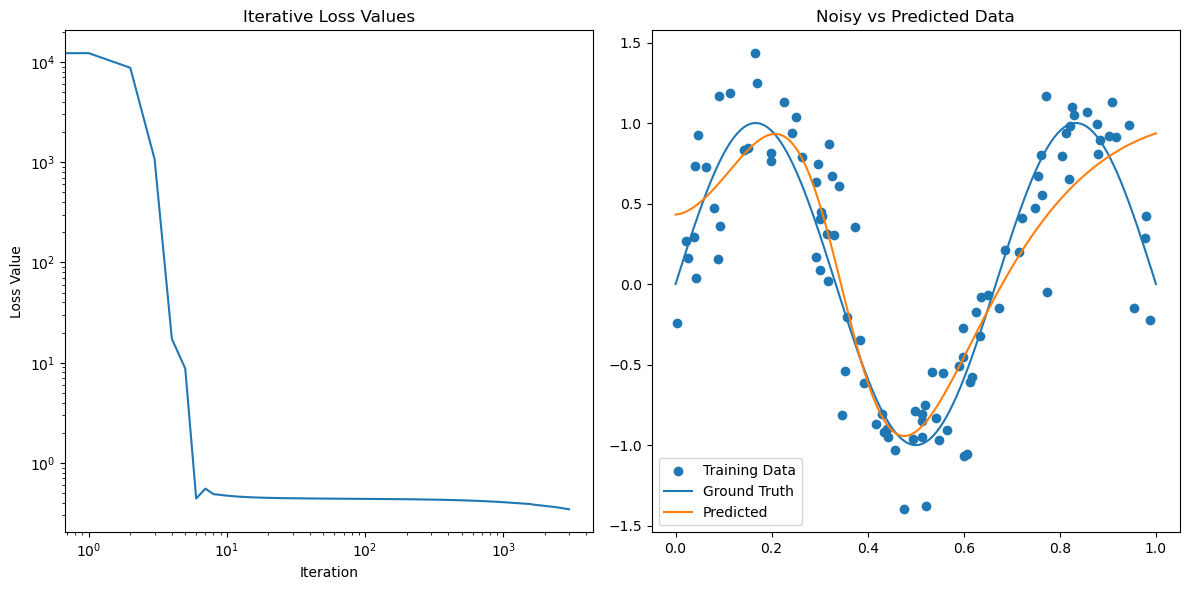

In [19]:
X_plot = np.linspace(0, 1, 1000)[:, None]
Y_plot_pred = model.predict(X_plot)
Y_plot_0 = f_x(X_plot)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the loss values
ax1.loglog(model.loss)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Loss Value")
ax1.set_title("Iterative Loss Values")

# Plot the noisy and predicted data
ax2.scatter(x, y, label="Training Data")
ax2.plot(X_plot, f_x(X_plot), label="Ground Truth")
ax2.plot(X_plot, Y_plot_pred, label="Predicted")
ax2.legend()
ax2.set_title("Noisy vs Predicted Data")

plt.tight_layout()
plt.show()